# 🔍---*** EXPLORING DATA SET ***---

# 1. Importing Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Initial Dataset Exploration

In [6]:
heart = pd.read_csv("/content/Heart_Final.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26078,72,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0
26082,67,0.0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart.shape

(26083, 14)

In [7]:
heart.duplicated().sum()

np.int64(0)

# 3. Data cleaning

### Rename the columns fo better understanding

In [8]:
heart = heart.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [ ]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


Most columns contain numerical values instead of categorical ones, as they are originally in label encoding form. We will convert them into actual values for better understanding of our data.

### Convert label encoding to actual values

In [10]:
heart["sex"] = heart["sex"].replace({0: "Female", 1: "Male"})

heart["chest_pain_type"] = heart["chest_pain_type"].replace({0: "Typical Angina", 1: "Atypical Angina", 2: "Non-anginal Pain", 3: "Asymptomatic"})

heart["fasting_blood_sugar"] = heart["fasting_blood_sugar"].replace({0: "False ≤ 120 mg/dl", 1: "True > 120 mg/dl"})

heart["resting_electrocardiogram"] = heart["resting_electrocardiogram"].replace({0: "Normal", 1: "ST-T wave abnormality", 2: "Left ventricular hypertrophy"})

heart["exercise_induced_angina"] = heart["exercise_induced_angina"].replace({0: "No", 1: "Yes"})

heart["st_slope"] = heart["st_slope"].replace({0: "Upsloping", 1: "Flat", 2: "Downsloping"})

heart["thalassemia"] = heart["thalassemia"].replace({0: "Unknown" ,1: "Normal", 2: "Fixed Defect", 3: "Reversible Defect"})

heart["target"] = heart["target"].replace({0: "No Heart Disease", 1: "Heart Disease"})


In [ ]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,57,Male,Asymptomatic,145,233,True > 120 mg/dl,Normal,150,No,2.3,Upsloping,0,Normal,Heart Disease
1,64,Female,Non-anginal Pain,130,250,False ≤ 120 mg/dl,ST-T wave abnormality,187,No,3.5,Upsloping,0,Fixed Defect,Heart Disease
2,52,Male,Atypical Angina,130,204,False ≤ 120 mg/dl,Normal,172,No,1.4,Downsloping,0,Fixed Defect,Heart Disease
3,56,Female,Atypical Angina,120,236,False ≤ 120 mg/dl,ST-T wave abnormality,178,No,0.8,Downsloping,0,Fixed Defect,Heart Disease
4,66,Female,Typical Angina,120,354,False ≤ 120 mg/dl,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,Heart Disease


In [ ]:
heart["thalassemia"].value_counts(0)

thalassemia
Fixed Defect         14359
Reversible Defect    10096
Normal                1474
Unknown                154
Name: count, dtype: int64

In [ ]:
heart["sex"].value_counts()

sex
Male      13029
Female    13029
Name: count, dtype: int64

In [ ]:
heart["chest_pain_type"].value_counts()

chest_pain_type
Typical Angina      12314
Non-anginal Pain     7392
Atypical Angina      4456
Asymptomatic         1921
Name: count, dtype: int64

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        26083 non-null  int64  
 1   sex                        26058 non-null  object 
 2   chest_pain_type            26083 non-null  object 
 3   resting_blood_pressure     26083 non-null  int64  
 4   cholesterol                26083 non-null  int64  
 5   fasting_blood_sugar        26083 non-null  object 
 6   resting_electrocardiogram  26083 non-null  object 
 7   max_heart_rate_achieved    26083 non-null  int64  
 8   exercise_induced_angina    26083 non-null  object 
 9   st_depression              26083 non-null  float64
 10  st_slope                   26083 non-null  object 
 11  num_major_vessels          26083 non-null  int64  
 12  thalassemia                26083 non-null  object 
 13  target                     26083 non-null  obj

In [ ]:
heart.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                        object
dtype: object

### handling missing value

In [11]:
heart.isna().sum()

,0
age,0
sex,25
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_electrocardiogram,0
max_heart_rate_achieved,0
exercise_induced_angina,0
st_depression,0


In [12]:
mode_value = heart['sex'].mode()[0]
heart['sex'] = heart['sex'].fillna(mode_value)
heart["sex"].value_counts()

,count
sex,
Female,13054
Male,13029


In [ ]:
heart.isna().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

In [ ]:
numerical_cols = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "num_major_vessels"]


In [ ]:
heart[numerical_cols].describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,num_major_vessels
count,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,131.592992,246.246061,149.655024,0.721849
std,15.189768,17.588809,51.643522,22.858109,1.011608
min,11.000000,94.000000,126.000000,71.000000,0.000000
25%,44.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,240.000000,153.000000,0.000000
75%,67.000000,140.000000,275.000000,166.000000,1.000000
max,98.000000,200.000000,564.000000,202.000000,4.000000


# 4. Exploratory Data Analysis

### Distribution of numerical columns

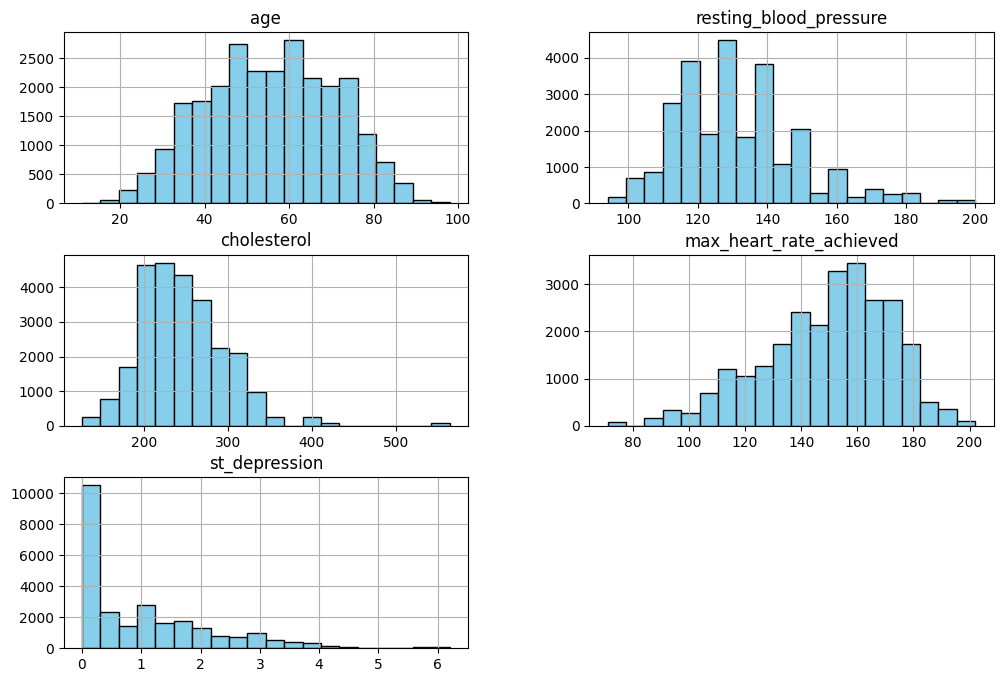

In [ ]:
numerical_cols = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "st_depression"]
heart[numerical_cols].hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.show()


## 1.Heart Disease vs. Demographics

##### Age Distribution and Heart Disease

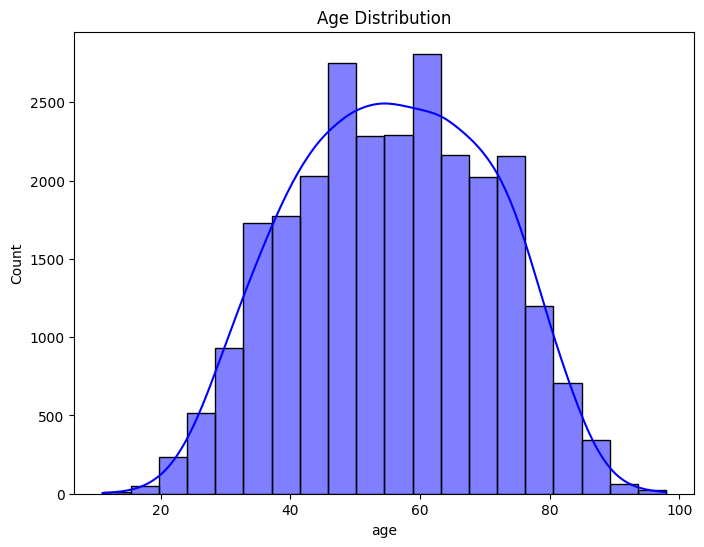

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(heart['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

<Figure size 900x600 with 0 Axes>

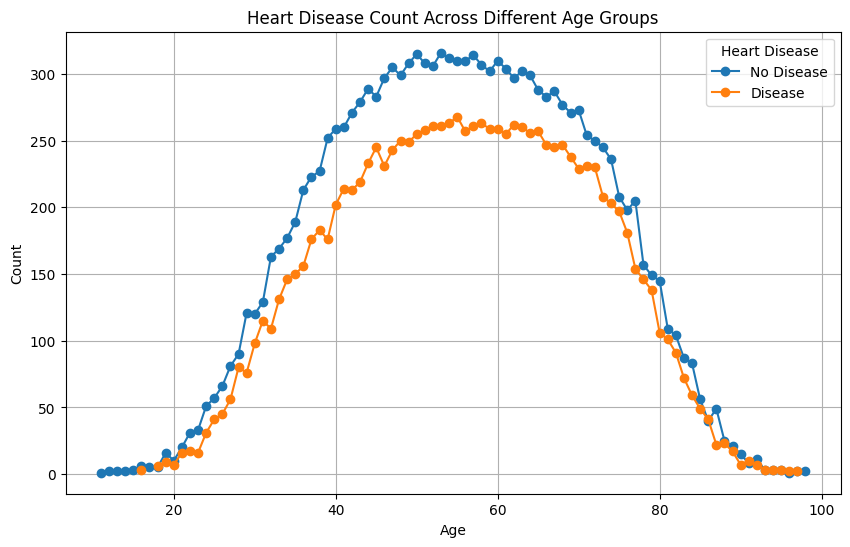

In [ ]:
plt.figure(figsize=(9,6))
heart.groupby('age')['target'].value_counts().unstack().plot(kind='line', marker='o', figsize=(10,6))
plt.title("Heart Disease Count Across Different Age Groups")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.grid(True)
plt.show()


#### Gender Distribution and Heart Disease

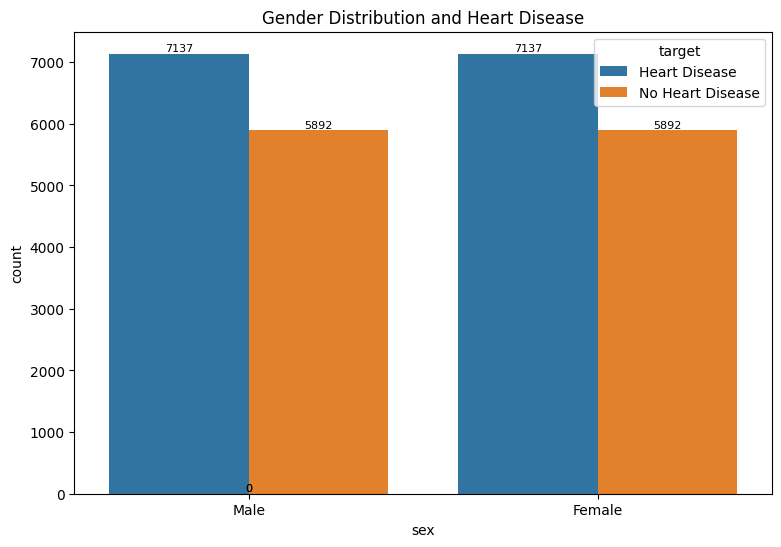

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(data=heart, x='sex', hue='target')
plt.title("Gender Distribution and Heart Disease")
for bar in plt.gca().patches:
    plt.gca().annotate(
        int(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8,color='black')
plt.show()


The proportion of affected individuals is significant in both genders.

## 2. Heart Disease vs. Vital Signs

##### Chest Pain Type and Heart Disease

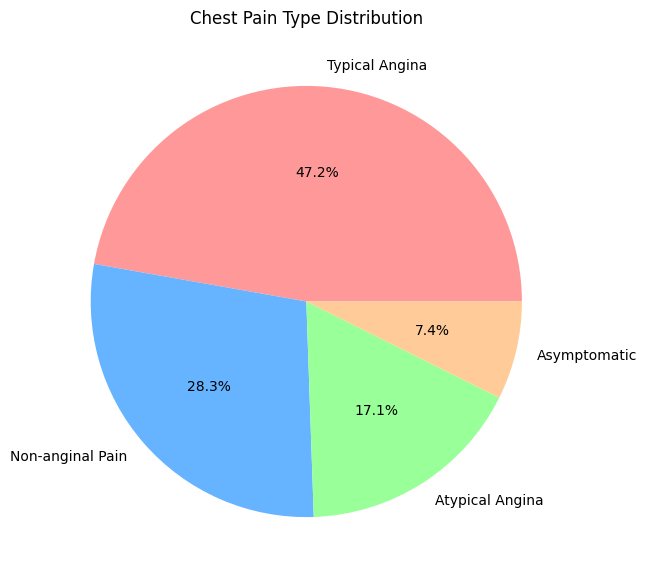

In [ ]:
plt.figure(figsize=(7,7))
heart['chest_pain_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Chest Pain Type Distribution")
plt.ylabel('')
plt.show()


In [ ]:
heart["chest_pain_type"].value_counts()/len(heart["chest_pain_type"])*100

chest_pain_type
Typical Angina      47.210827
Non-anginal Pain    28.340298
Atypical Angina     17.083924
Asymptomatic         7.364950
Name: count, dtype: float64

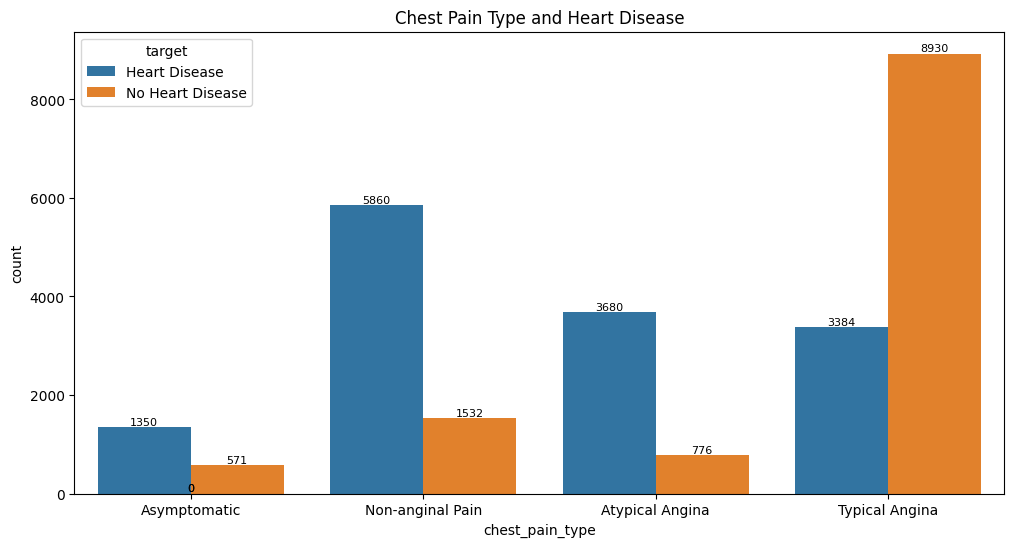

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=heart, x='chest_pain_type', hue='target')
plt.title("Chest Pain Type and Heart Disease")
for bar in plt.gca().patches:
    plt.gca().annotate(
        int(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8,color='black')
plt.show()

* **Non-Anginal Pain** chest pain (Type 2) is highly correlated with heart disease.
* Patients with **Typical Angina** (Type 1) and **Asymptomatic** (Type 3) have a lower probability of heart disease.

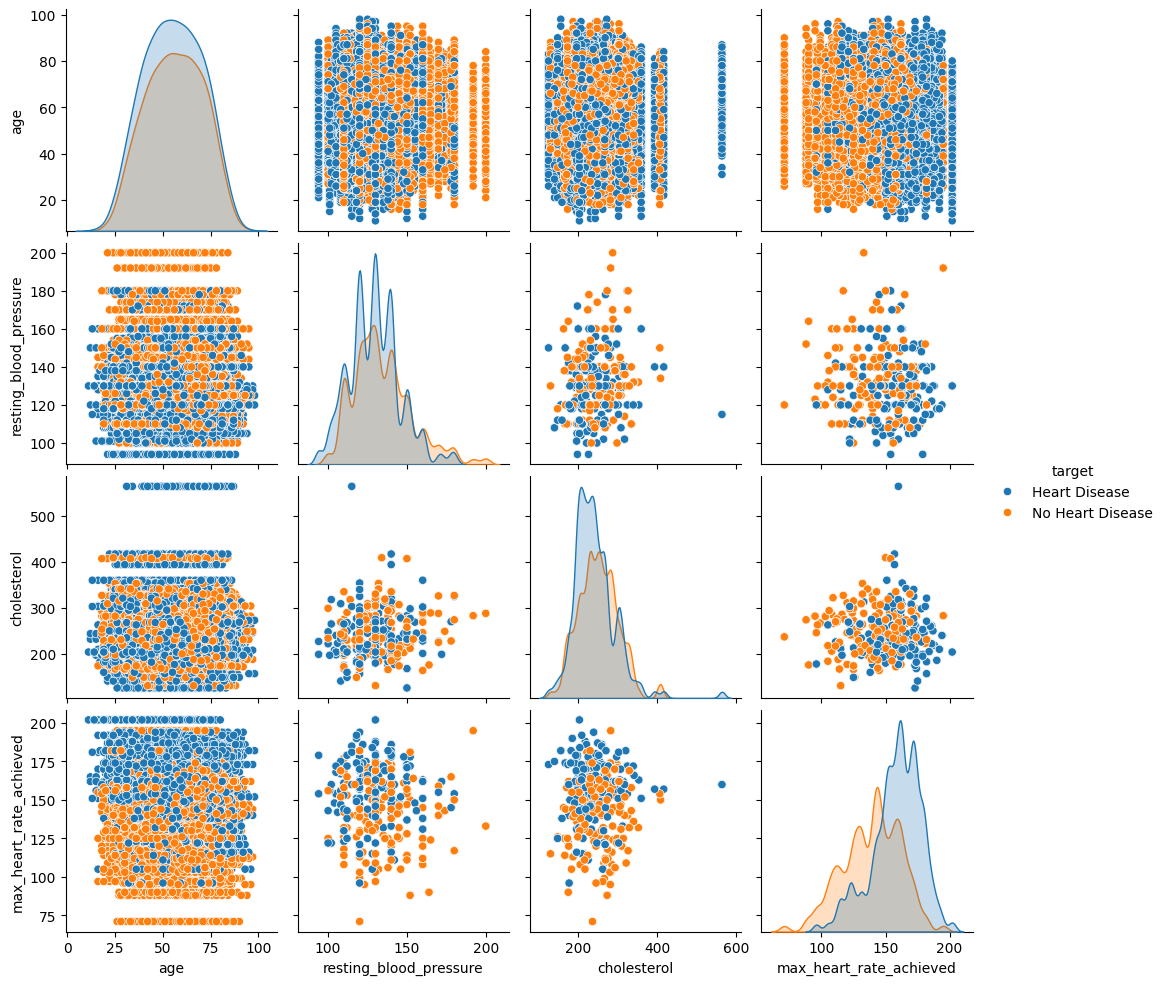

In [ ]:
sns.pairplot(heart, hue='target', diag_kind='kde', vars=['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved'])
plt.show()

## 3. Feature to Target Relationship

### overview of feature and target relationship

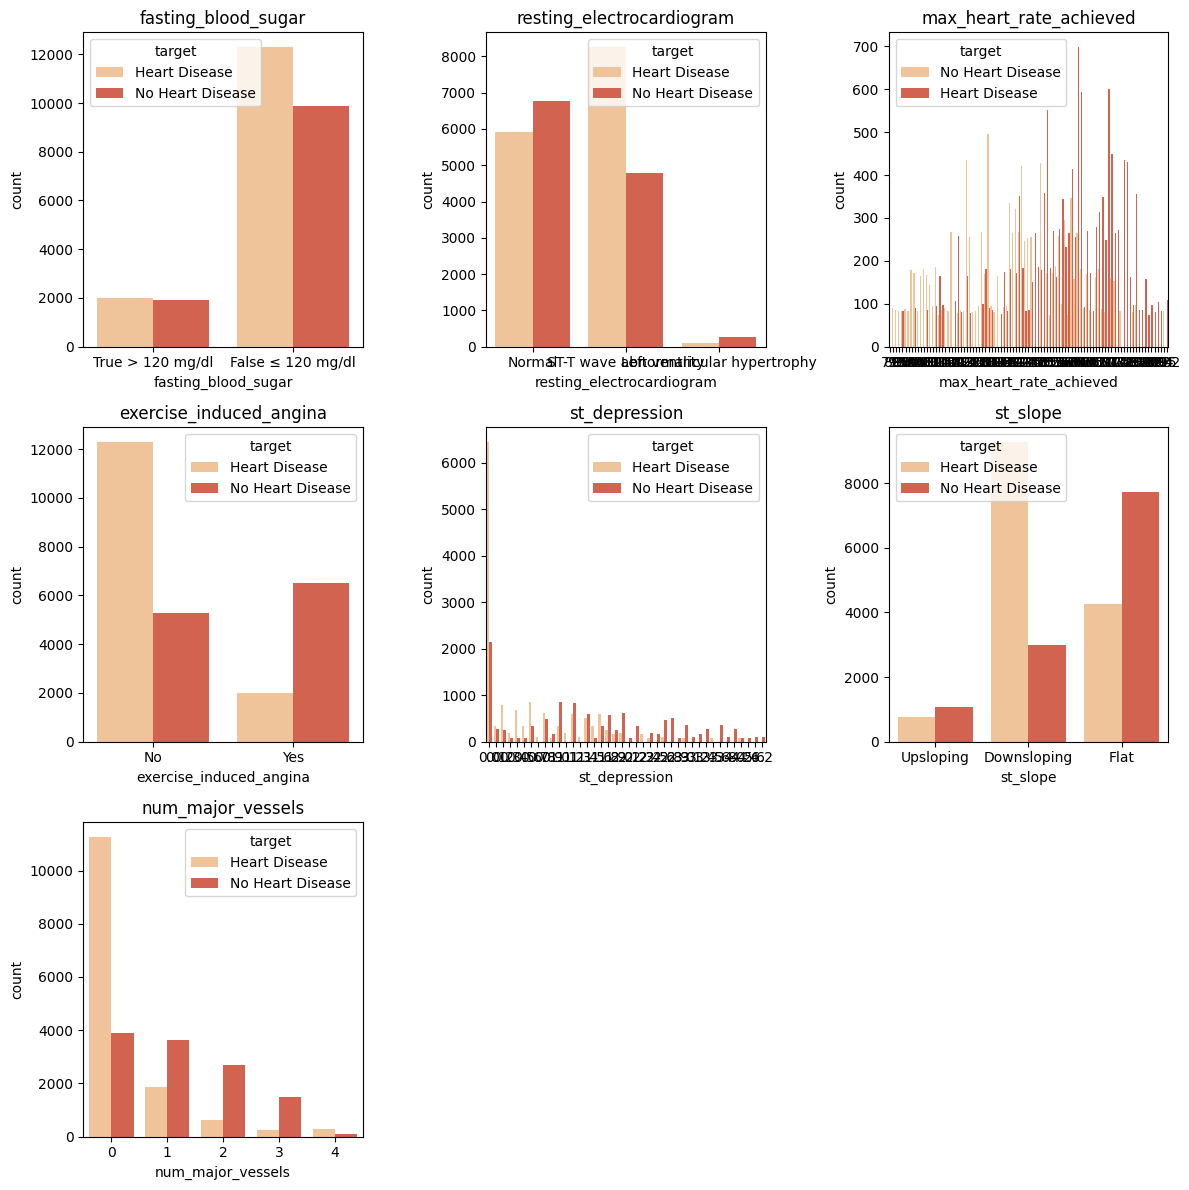

In [ ]:
features = ['fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels']

plt.figure(figsize=(12, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=heart[col], palette="OrRd", hue=heart["target"])
    plt.title(col)
plt.tight_layout()
plt.show()

1. **Fasting Blood Sugar (fbs)**
Most individuals in the dataset have a fasting blood sugar ≤ 120 mg/dl.
High fasting blood sugar (> 120 mg/dl) is not as common, but when it occurs, it appears slightly more in heart disease patients.
2. **Resting Electrocardiogram (restecg)**
The majority of individuals fall into category 0 (Normal ECG).
Individuals with ECG abnormalities (categories 1 and 2) tend to have higher heart disease prevalence compared to those with normal ECG.
3. **Maximum Heart Rate Achieved (thalach)**
Higher maximum heart rates are more common among heart disease patients.
This suggests that those with heart disease may experience higher peak heart rates, possibly due to reduced heart efficiency.
4. **Exercise-Induced Angina (exang)**
People who do not experience exercise-induced angina (exang = 0) are significantly more common in both heart disease and non-heart disease groups.
However, among those with exercise-induced angina (exang = 1), the proportion of heart disease cases is much higher.
5. **ST Depression (oldpeak)**
Higher ST depression values are associated with a greater likelihood of heart disease.
Patients with lower ST depression levels tend to have a more balanced distribution between heart disease and no heart disease.
6. **ST Slope (st_slope)**
A Flat ST slope (st_slope = 1) is the most common category and is highly associated with heart disease.
An Upsloping ST slope (st_slope = 2) is more common in people without heart disease, while Downsloping ST slope (st_slope = 3) also shows a strong connection to heart disease.
7. **Number of Major Vessels (num_major_vessels)**
People with 0 major vessels tend to have heart disease more frequently.
As the number of major vessels increases, the likelihood of heart disease decreases, suggesting that reduced blood vessel blockages lower the risk.

##### Cholesterol Levels by Heart Disease

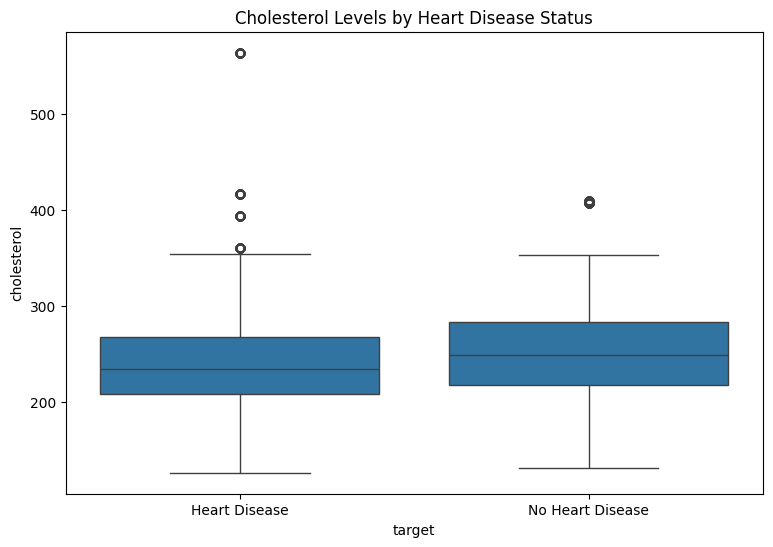

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(data=heart, x='target', y='cholesterol')
plt.title("Cholesterol Levels by Heart Disease Status")
plt.show()


* Individuals with heart disease tend to have a higher median cholesterol level compared to those without.
However, there are several high-cholesterol outliers in both categories, indicating that cholesterol alone is not the sole determining factor.
* The variability in cholesterol levels suggests that other features (such as blood pressure, age, or lifestyle) may play a more crucial role.

##### Max Heart Rate by Heart Disease

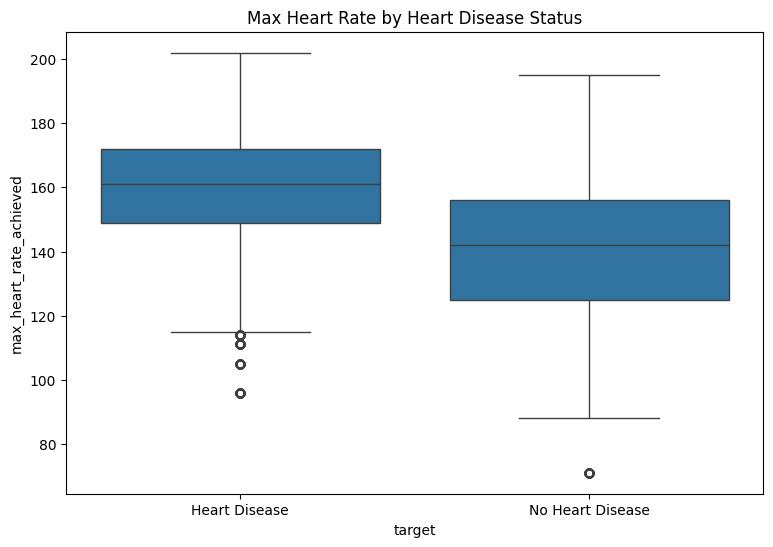

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(data=heart, x='target', y='max_heart_rate_achieved')
plt.title("Max Heart Rate by Heart Disease Status")
plt.show()

* Individuals without heart disease generally achieve higher max heart rates compared to those with heart disease.
* This suggests that a lower max heart rate could indicate compromised heart function.
* The distribution also shows a few younger individuals with lower max heart rates, possibly due to underlying conditions.

##### ST Slope vs ST Depression with Heart Disease

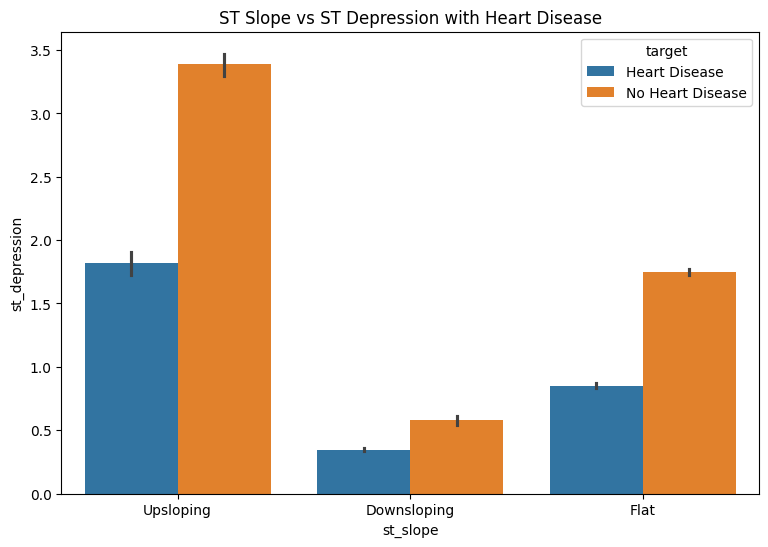

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(data=heart, x='st_slope', y='st_depression', hue='target')
plt.title("ST Slope vs ST Depression with Heart Disease")
plt.show()

* Individuals with an Upsloping ST Slope tend to have higher ST Depression levels when they do not have heart disease compared to those who do.
* Flat ST Slope is more commonly associated with heart disease, aligning with medical findings that a flat or downsloping ST segment is more indicative of ischemia.
* The Downsloping category has low ST depression values across both groups but is slightly more present in those with heart disease.

##### Thalassemia Types and Heart Disease

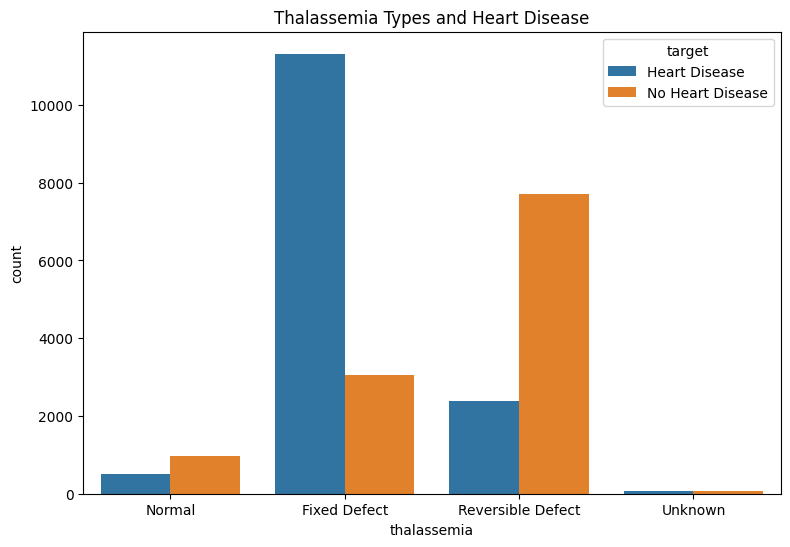

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(data=heart, x='thalassemia', hue='target')
plt.title("Thalassemia Types and Heart Disease")
plt.show()

* Patients with a Fixed Defect type of Thalassemia have the highest occurrence of heart disease.
* The Reversible Defect type is more common among individuals without heart disease than those with it.
* The Normal category has a very low count, indicating that Thalassemia (especially Fixed Defect) could be a strong risk factor for heart disease.

## 4. Feature to Feature Relationship

##### Age vs Resting Blood Pressure

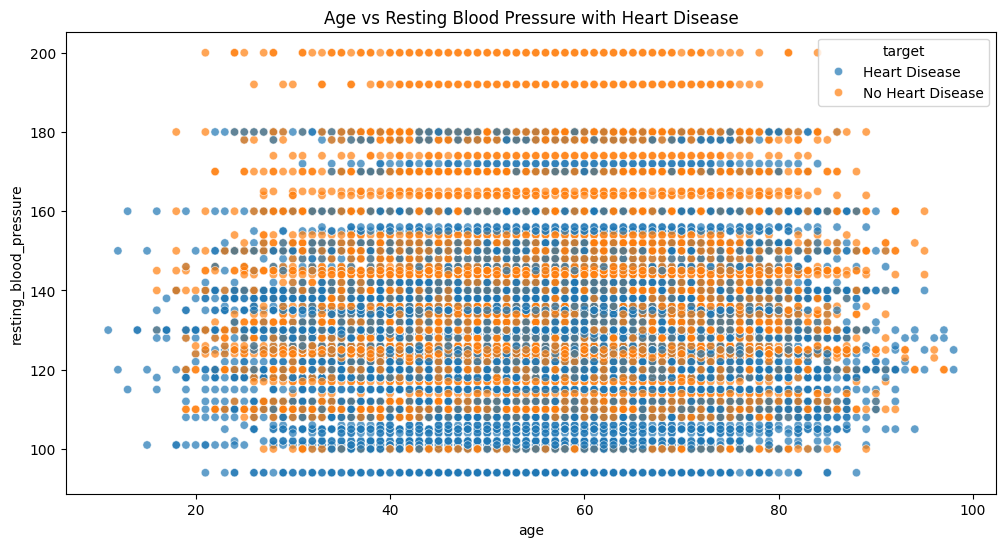

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=heart, x='age', y='resting_blood_pressure', hue='target', alpha=0.7)
plt.title("Age vs Resting Blood Pressure with Heart Disease")
plt.show()

* No strong linear correlation between age and blood pressure.
* some heart disease patients exhibit higher blood pressure.

##### Age vs Cholesterol

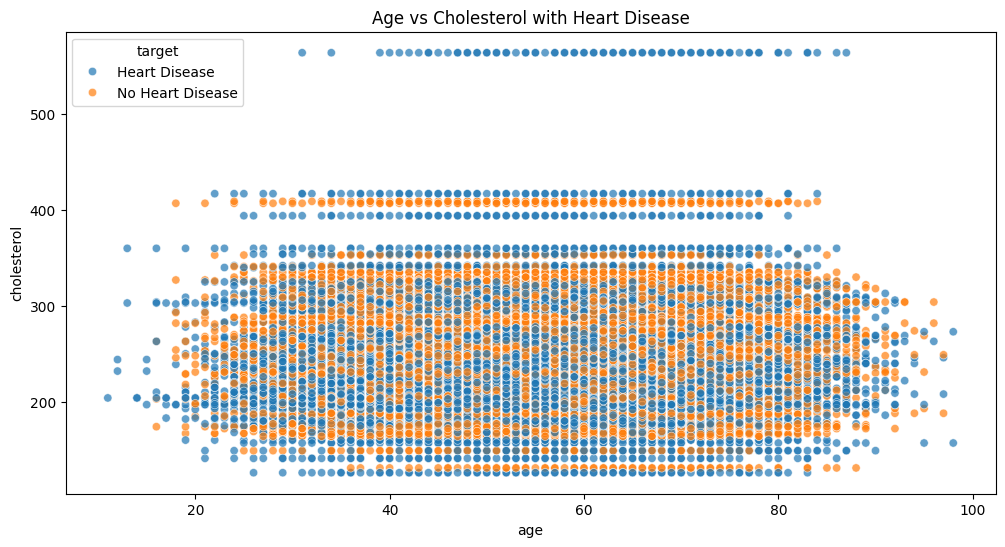

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=heart, x='age', y='cholesterol', hue='target', alpha=0.7)
plt.title("Age vs Cholesterol with Heart Disease")
plt.show()

* Higher cholesterol levels are seen across all ages.
* Some heart disease patients have **moderate** to **high** cholesterol levels.

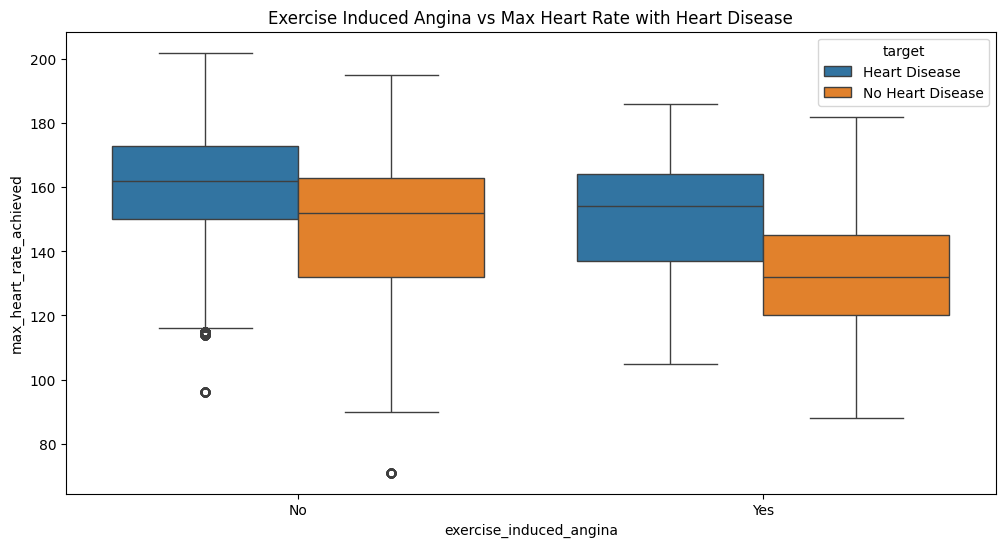

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=heart, x='exercise_induced_angina', y='max_heart_rate_achieved', hue='target')
plt.title("Exercise Induced Angina vs Max Heart Rate with Heart Disease")
plt.show()

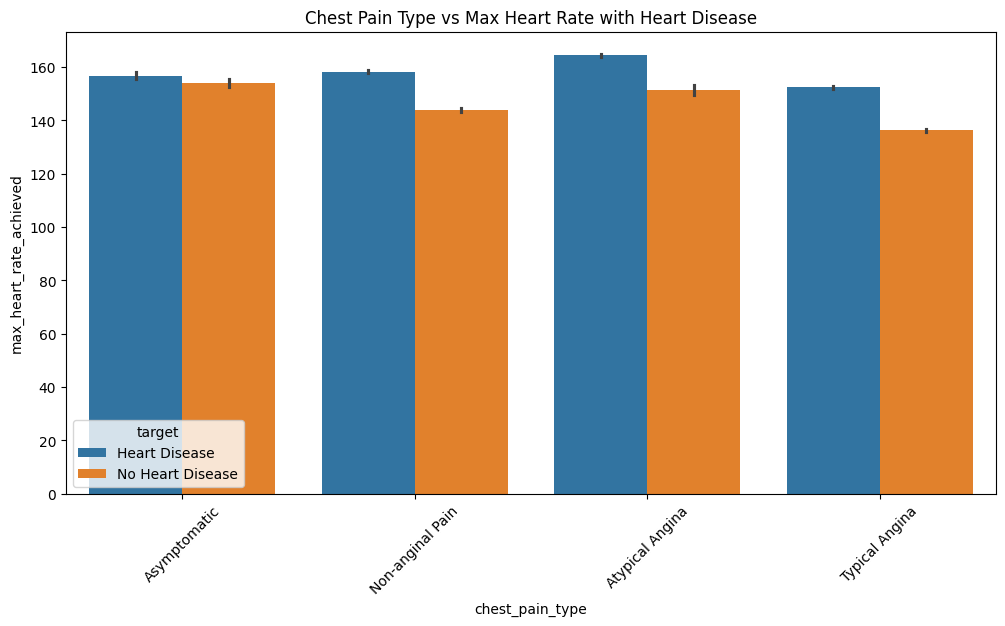

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart, x='chest_pain_type', y='max_heart_rate_achieved', hue='target')
plt.xticks(rotation=45)
plt.title("Chest Pain Type vs Max Heart Rate with Heart Disease")
plt.show()

##### Max Heart Rate Achieved vs ST Depression

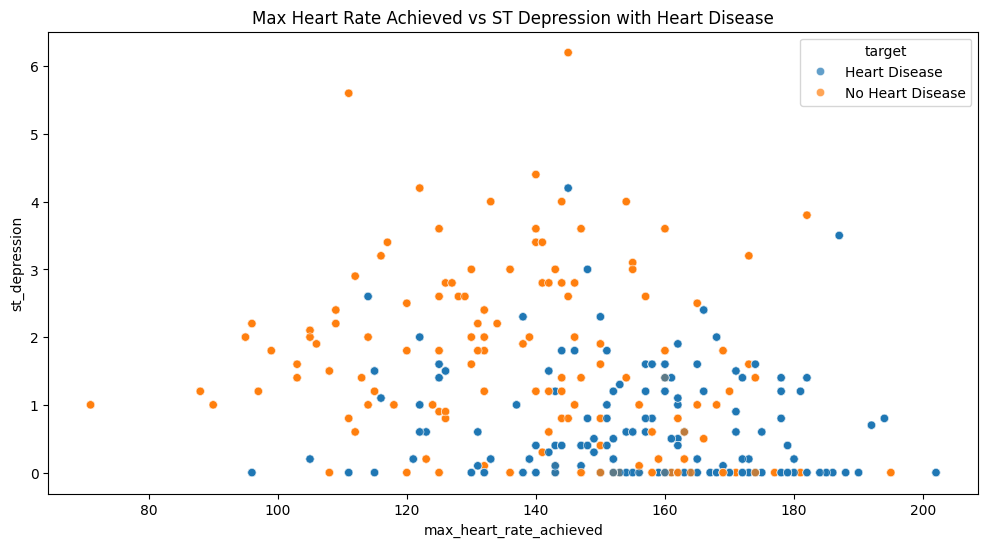

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=heart, x='max_heart_rate_achieved', y='st_depression', hue='target', alpha=0.7)
plt.title("Max Heart Rate Achieved vs ST Depression with Heart Disease")
plt.show()

* Patients with lower max heart rate and high ST depression are more likely to have heart disease.
* Indicates poor heart performance under stress.

##### Number of Major Vessels vs ST Depression

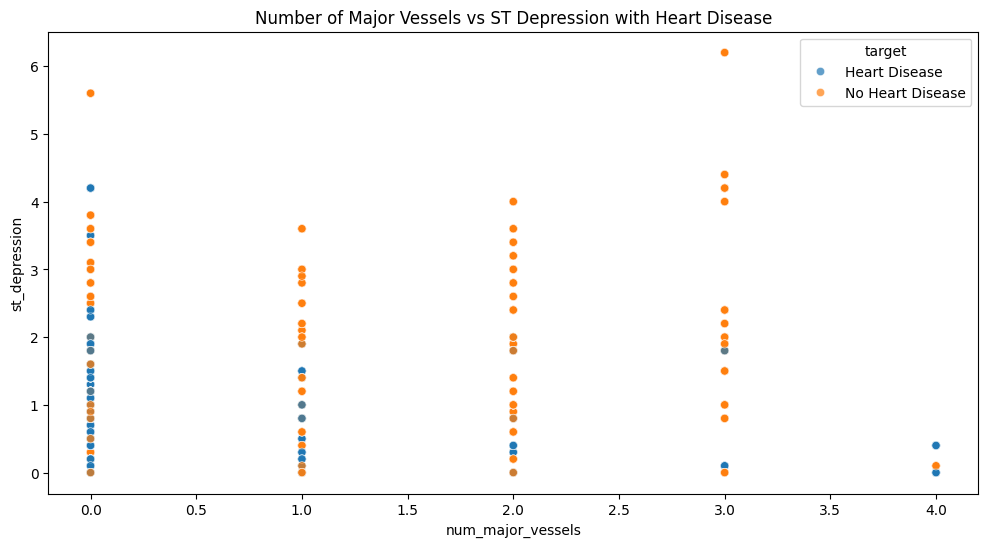

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=heart, x='num_major_vessels', y='st_depression', hue='target', alpha=0.7)
plt.title("Number of Major Vessels vs ST Depression with Heart Disease")
plt.show()

* Higher ST depression correlates with multiple major blocked vessels.This suggests the severity of heart disease.
*  Higher number of major vessels indicates lower probability of heart disease.
*   ST Depression tends to be higher in those diagnosed with heart disease.


# 🤖 ---*** APPLYING MACHINE LEARNING***---

In [ ]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
df_final=heart.copy()

In [14]:
X = df_final.drop(columns=['target'])
y = df_final['target']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()
X_encoded = X.copy()

for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform, not fit_transform


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print dataset sizes
print("Training size:", X_train_scaled.shape)
print("Testing size:", X_test_scaled.shape)


Training size: (18258, 13)
Testing size: (7825, 13)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, precision_recall_curve # Import precision_recall_curve
import numpy as np

rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=4,            
    min_samples_split=20,   
    min_samples_leaf=10,   
    max_features="log2",    
    class_weight={0: 1, 1: 1.5}, 
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_probs = rf.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

f1_scores = 2 * (precision * recall) / (precision + recall)

optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold (F1 Score): {optimal_threshold}")

# Predict using the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

print("Accuracy using optimal threshold:", accuracy_score(y_test, y_pred_optimal))
print("\nClassification Report using optimal threshold:\n", classification_report(y_test, y_pred_optimal))
print("\nConfusion Matrix using optimal threshold:\n", confusion_matrix(y_test, y_pred_optimal))


y_train_decoded = label_encoder.inverse_transform(y_train)

y_test_decoded = label_encoder.inverse_transform(y_test)

y_pred_decoded = label_encoder.inverse_transform(y_pred_optimal) 

# Print the decoded values
print("Decoded Training Labels:", y_train_decoded)
print("Decoded Test Labels:", y_test_decoded)
print("Decoded Predicted Labels:", y_pred_decoded)

Optimal Threshold (F1 Score): 0.4413655729728302
Accuracy using optimal threshold: 0.9061980830670926

Classification Report using optimal threshold:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      4292
           1       0.88      0.92      0.90      3533

    accuracy                           0.91      7825
   macro avg       0.90      0.91      0.91      7825
weighted avg       0.91      0.91      0.91      7825


Confusion Matrix using optimal threshold:
 [[3835  457]
 [ 277 3256]]
Decoded Training Labels: ['Heart Disease' 'No Heart Disease' 'Heart Disease' ... 'No Heart Disease'
 'No Heart Disease' 'Heart Disease']
Decoded Test Labels: ['No Heart Disease' 'No Heart Disease' 'No Heart Disease' ...
 'No Heart Disease' 'No Heart Disease' 'Heart Disease']
Decoded Predicted Labels: ['Heart Disease' 'No Heart Disease' 'No Heart Disease' ... 'Heart Disease'
 'No Heart Disease' 'Heart Disease']


In [30]:

train_df = pd.DataFrame(X_train_scaled, index=X_train.index)
test_df = pd.DataFrame(X_test_scaled, index=X_test.index)

common_indices = train_df.index.intersection(test_df.index)

if not common_indices.empty:
    print("Warning: Training and Testing sets have overlapping samples!")
    print(common_indices)
else:
    print("✅ No overlapping samples between training and testing sets.")


✅ No overlapping samples between training and testing sets.


In [31]:
train_accuracy = accuracy_score(y_train, rf.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9035
Test Accuracy: 0.8944


In [32]:
for original_label, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original_label} -> {encoded_value}")

Heart Disease -> 0
No Heart Disease -> 1


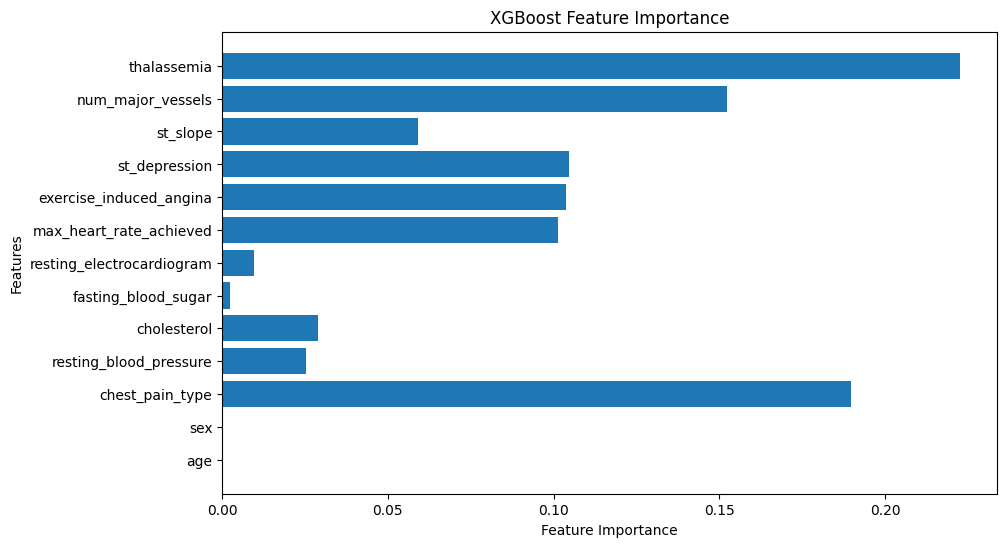

In [33]:
import matplotlib.pyplot as plt

feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [34]:
df_final.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [35]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_optimal)
print("AUC-ROC Score:", auc)


AUC-ROC Score: 0.9075596050973527


In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


train_pred = rf.predict(X_train_scaled)
test_pred = rf.predict(X_test_scaled)

metrics = {
    "Accuracy": accuracy_score,
    "Recall": recall_score,
    "Precision": precision_score,
    "F1 Score": f1_score,
    "AUC-ROC": roc_auc_score
}


print("Performance Comparison:")
for metric_name, metric_func in metrics.items():
    train_score = metric_func(y_train, train_pred)
    test_score = metric_func(y_test, test_pred)
    print(f"{metric_name}: Train = {train_score:.4f}, Test = {test_score:.4f}")


if accuracy_score(y_train, train_pred) - accuracy_score(y_test, test_pred) > 0.05:
    print("\n⚠️ Potential Overfitting Detected: Training accuracy is much higher than test accuracy.")
elif accuracy_score(y_train, train_pred) < 0.85 and accuracy_score(y_test, test_pred) < 0.85:
    print("\n⚠️ Potential Underfitting Detected: Both training and test accuracy are low.")
else:
    print("\n✅ Model is well-generalized (No major overfitting or underfitting).")


Performance Comparison:
Accuracy: Train = 0.9035, Test = 0.8944
Recall: Train = 0.8818, Test = 0.8712
Precision: Train = 0.9030, Test = 0.8924
F1 Score: Train = 0.8923, Test = 0.8817
AUC-ROC: Train = 0.9016, Test = 0.8924

✅ Model is well-generalized (No major overfitting or underfitting).


In [38]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

recall_scorer = make_scorer(recall_score)

cv_scores = cross_val_score(rf, X_encoded, y_encoded, cv=5, scoring=recall_scorer)

print(f"Recall scores for each fold: {cv_scores}")
print(f"Average recall score: {cv_scores.mean()}")

Recall scores for each fold: [0.87552921 0.88780694 0.88441998 0.87844134 0.87722269]
Average recall score: 0.880684033982931
